修改工作目录（不要反复执行）

In [1]:
import os


# 获取当前工作目录
current_dir = os.getcwd()
# 获取上一级目录
parent_dir = os.path.dirname(current_dir)
# 将工作目录更改为上一级目录
%cd {parent_dir}


/root/autodl-tmp


导入需要的函数

In [2]:
from src import (
    create_logger, get_default_config,
    create_dataset, create_dataloader,
    build_model,
    SN_training, SN_testing, SN_predicting,
    F1Score, CrossEntropyLoss, Adam, MyCrossEntropyLoss, NDCG, PairwiseRankLoss,
    draw_loss_and_metrics
)

import warnings
warnings.filterwarnings('ignore')

前期准备

In [3]:
# 加载配置文件
config = get_default_config()

# 可以在这里更新你自己的配置
config.merge_from_file('configs/SAS4Rec_4.yaml')

In [4]:
# 加载日志记录器
logger = create_logger(config)

# 输出一条信息
logger.info('---------- NEW TURN TRAIN ----------')

---------- NEW TURN TRAIN ----------


加载数据

In [5]:
# 创建数据集
train_dataset, val_dataset, test_dataset = create_dataset(config)

# 创建数据集加载器
train_dataloader, val_dataloader, test_dataloader = create_dataloader(train_dataset, val_dataset, test_dataset, config)

建立模型并开始训练

In [6]:
# 加载模型
model = build_model(config)

# 定义训练组件
loss_fn = CrossEntropyLoss()
metricses = [F1Score(task='multiclass', num_classes=config.model.input_size)]
# metricses = [NDCG(k=10)]
optimizer = Adam(model.parameters(), lr=1e-3)

# 开始训练
train_dict = SN_training(model, train_dataloader, val_dataloader, metricses, loss_fn, optimizer, logger, config)

Training start!
Epoch 1 -------------------------------
100%|██████████| 24786/24786 [02:27<00:00, 167.85it/s]
Train Loss: 6.377759
Train MulticlassF1Score(): 0.105367
100%|██████████| 418/418 [00:00<00:00, 536.96it/s]
Val Loss: 6.608917
Val MulticlassF1Score(): 0.105440
Epoch 2 -------------------------------
100%|██████████| 24786/24786 [02:27<00:00, 167.60it/s]
Train Loss: 5.855977
Train MulticlassF1Score(): 0.126248
100%|██████████| 418/418 [00:00<00:00, 529.80it/s]
Val Loss: 6.515473
Val MulticlassF1Score(): 0.109820
Epoch 3 -------------------------------
100%|██████████| 24786/24786 [02:27<00:00, 167.58it/s]
Train Loss: 5.717854
Train MulticlassF1Score(): 0.132746
100%|██████████| 418/418 [00:00<00:00, 521.80it/s]
Val Loss: 6.485846
Val MulticlassF1Score(): 0.110868
Epoch 4 -------------------------------
100%|██████████| 24786/24786 [02:31<00:00, 163.79it/s]
Train Loss: 5.630080
Train MulticlassF1Score(): 0.137208
100%|██████████| 418/418 [00:00<00:00, 525.65it/s]
Val Loss: 6.4

可视化

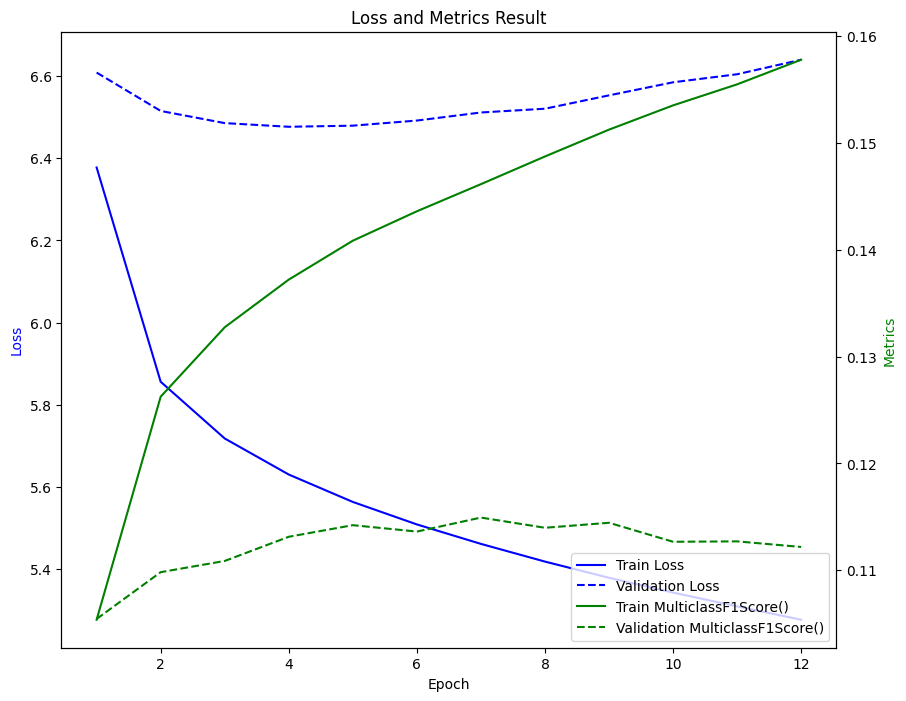

In [7]:
# 绘制图像
draw_loss_and_metrics(train_dict['train_losses'], train_dict['val_losses'], train_dict['train_metricses'],
                      train_dict['val_metricses'], metricses, config)

测试结果

In [8]:
predict_nums = 10
y_pred = SN_predicting(model, test_dataloader, predict_nums, config)

100%|██████████| 418/418 [00:00<00:00, 697.52it/s]


结果提交

In [9]:
import pandas as pd

df = pd.read_csv('data/test_dataset.csv')
user_id = df['user_id'].values
y_pred = y_pred[user_id].flatten()
user_id = user_id.repeat(predict_nums)

df = pd.DataFrame({'user_id': user_id, 'item_id': y_pred})
df.to_csv('data/SAS_submission_5.csv', index=False)
df

,user_id,item_id
0,0,439
1,0,1797
2,0,290
3,0,815
4,0,1010
...,...,...
534235,49801,5608
534236,49801,2548
534237,49801,7599
534238,49801,3607
